<a href="https://colab.research.google.com/github/MochamadPhilliaWibowo/Machine-Learning-Class/blob/main/Tugas%20Week%203/Google%20Colab/Decison%20Tree/Tugas_Lecture_3_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Mochamad Phillia Wibowo

NIM  : 1103204191

Kelas : Machine Learning (TK-44-G04)

Tugas 3 Decision Tree Model

In [17]:
# Langkah 1: Impor library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [18]:
# Langkah 2: Muat dataset Iris
iris = load_iris()

In [30]:
# Langkah 3: Tampilkan beberapa baris pertama dari data fitur
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [19]:
# Langkah 4: Buat data frame dari dataset
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
iris_df['species'] = iris_df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [29]:
# Langkah 5: Menampilkan informasi tentang DataFrame iris_df
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
 5   species            150 non-null    object 
dtypes: float64(5), object(1)
memory usage: 7.2+ KB


In [20]:
# Langkah 6: Bagi dataset menjadi fitur (X) dan target (y)
X = iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = iris_df['species']

In [21]:
# Langkah 7: Bagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Langkah 8: Buat model Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [23]:
# Langkah 9: Lakukan prediksi menggunakan model
y_pred = clf.predict(X_test)

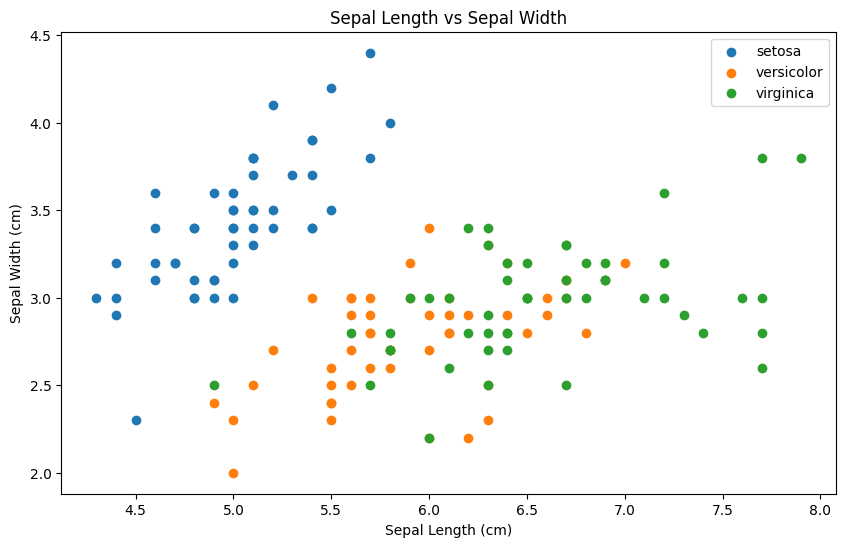

In [24]:
# Langkah 10: Visualisasikan scatter plot
plt.figure(figsize=(10, 6))
for species in iris.target_names:
    plt.scatter(iris_df[iris_df['species'] == species]['sepal length (cm)'],
                iris_df[iris_df['species'] == species]['sepal width (cm)'],
                label=species)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width')
plt.legend()
plt.show()

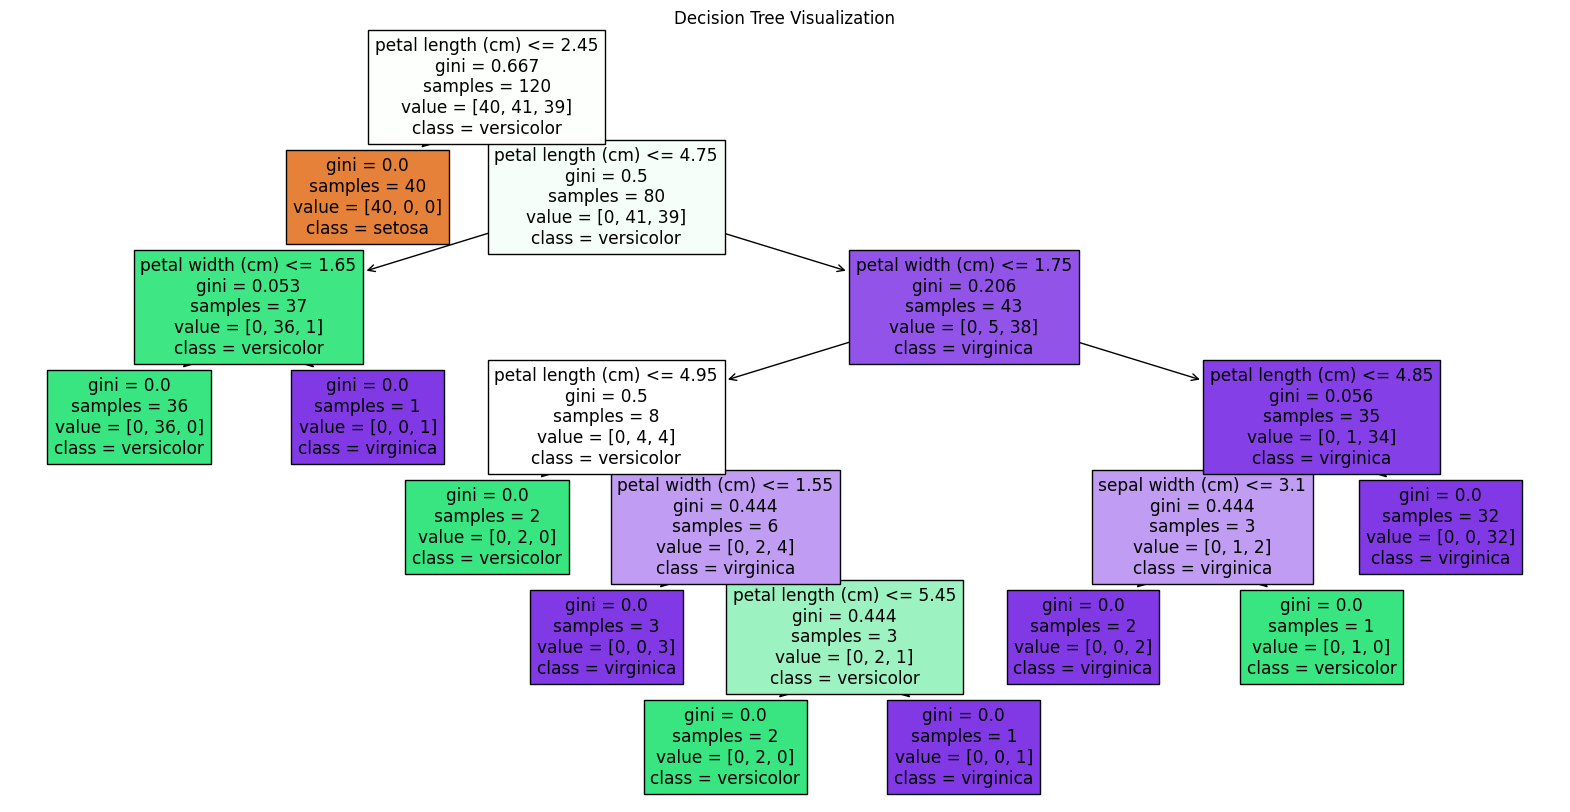

In [25]:
# Langkah 11: Visualisasikan pohon keputusan
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

In [26]:
# Langkah 12: Buat confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=iris.target_names)

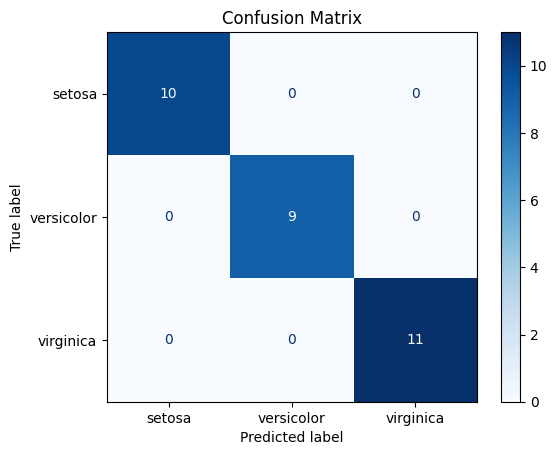

In [27]:
# Langkah 13: Visualisasikan confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()